In [0]:
print("Benjamin Straus, Email: bstraus7@jhu.edu, Github ID: bstraus1")

Benjamin Straus, Email: bstraus7@jhu.edu, Github ID: bstraus1


# Question 1

The estimated probability of failure from the model for a temperature of 74 degrees is 0.107061826026118


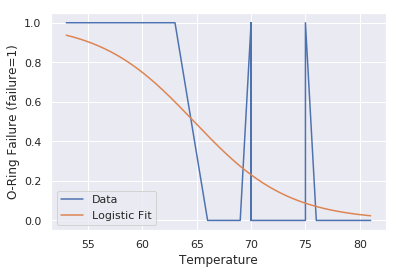

In [0]:
# Setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels as sm

sns.set()

! if [ ! -e orings.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi;
  
dat = pd.read_csv("orings.csv")


# Part a
plt.plot(dat['Temperature'], dat['Total']>0)
plt.xlabel("Temperature")
plt.ylabel("O-Ring Failure (failure=1)")

xdata = dat['Temperature'].values
ydata = dat['Total']>0

# Part b
lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs') # Setup model
fit = lr.fit(xdata.reshape(-1,1), ydata) # fit the data to the model

beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

# Part c
n = 1000
xplot = np.linspace(53,81, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))
sns.lineplot(xplot, p)
plt.legend(['Data', 'Logistic Fit'])

# Part d
x_test = np.asarray(74)
# yhat_test = fit.predict(x_test.reshape(-1,1))
eta = beta0 + beta1 * x_test
p = 1 / (1 + np.exp(-eta))
print("The estimated probability of failure from the model for a temperature of 74 degrees is {}".format(p))


# Question 2

![Quiz 3 Question 2](https://github.com/bstraus1/Public/blob/master/Quiz%203%20Q%202.jpg?raw=true)

# Question 3

In [53]:
# I will perform some regression to predict number of accidents for an airline based on the amount flown (in seat*km/week)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels as sm

sns.set()

! if [ ! -e airline-safety.csv ]; \
then wget https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv; \
fi;
  
dat = pd.read_csv("airline-safety.csv")
dat.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0
